<a href="https://colab.research.google.com/github/ryu0315360/Testing/blob/main/ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# library & class define

In [ ]:
!pip install keras.utils

  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=aa65f257c65e234392f8f28ba04c588c3752d96a43ac9479bb565f0bdaa0139e
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


In [ ]:
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import (Convolution2D, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)

# sklearn
from sklearn.preprocessing import LabelEncoder

# Other  
from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew

import json
import tensorflow as tf
from matplotlib.pyplot import specgram

import IPython.display as ipd  # To play sound in the notebook

In [ ]:
import pandas as pd
import librosa
import librosa.display
import soundfile
import os, glob, pickle, sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
# from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

In [ ]:
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [ ]:
## path!

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
## from 2sec data (after duration processing)

path_orig2 = 'gdrive/MyDrive/data/audio_speech_actors_01-24/2sec_data/*.wav' ## RAVDESS before padding 
path_tess2 = 'gdrive/MyDrive/TESS_Data/2sec_data/*.wav' 

In [ ]:
pip install pydub

In [ ]:
pip install audiomentations

In [ ]:
from pydub import AudioSegment

In [ ]:
import tensorflow.keras.layers as tfl

In [ ]:
import random
import numpy as np
import tensorflow as tf
random.seed(299)
np.random.seed(299)
tf.random.set_seed(299)

In [ ]:
# Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
# Emotions to observe
# observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [ ]:
emotions_tess = {
  'neutral':'neutral',
  # '02':'calm',
  'happy':'happy',
  'sad':'sad',
  'angry':'angry',
  'fear':'fearful',
  'disgust':'disgust',
  # '08':'surprised'
}

# comparision model- conv2d (mel2d)

## data preprocessing (feature extraction, train test split)

In [ ]:
def extract_mel2d(file, plot_mel = False): # mel 2d

  y, sr = librosa.load(file, sr = 48000)
  result=np.array([])

  mel = librosa.feature.melspectrogram(y=y, sr=48000, n_mels=128)
  # print("shape of mel: ", mel.shape)

  result = np.array(mel)
  result = np.expand_dims(result, axis=-1)
  # print("shape of result : ", result.shape)

  if plot_mel:
    fig, ax = plt.subplots()
    mel_dB = librosa.power_to_db(mel, ref=np.max)
    img = librosa.display.specshow(mel_dB, x_axis='time', y_axis='mel', sr=sr, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title='Mel-frequency spectrogram')
    # print("mel_dB: ", mel_dB) 
    # print("This is mel_dB.shape : ", mel_dB.shape) # (128, 300-400)
    plt.show()

  return result

In [ ]:
# MAIN mel 2d 
def load_data_mel2d(test_size = 0.2, plot_mel = False):

  x = np.array([])
  cnt = 0
  # x,y=[],[]
  y = []

  for file in glob.glob(path_tess2):
    
    try:
      file_name=os.path.basename(file)
      #converting stereo audio to mono
      sound = AudioSegment.from_wav(file)
      sound = sound.set_channels(1)
      sound.export(file, format="wav")

    except:
      print("decoding error")
      continue
    
    if 'ps' in file_name:
        continue

    if sound.duration_seconds != 2.0:
      print("duration error!")
      continue

    
    if 'aug' in file_name:
      emotion=emotions_tess[file_name.split("_")[2]]
    else:
      emotion=emotions_tess[file_name.split("_")[2][:-4]]
      
    features = extract_mel2d(file, plot_mel)
    # cnt += 1

    if x.size == 0:
      features = features.reshape(1, features.shape[0], features.shape[1], features.shape[2])
      x = features
    else:
      features = features.reshape(1, features.shape[0], features.shape[1], features.shape[2])
      x = np.vstack((x, features))

    print("This is x.shape: ", x.shape)
    # print(x)
    y.append(emotion)
    # print("append success") 

  for file in glob.glob(path_orig2):
    
    try:
      file_name=os.path.basename(file)
      #converting stereo audio to mono
      sound = AudioSegment.from_wav(file)
      sound = sound.set_channels(1)
      sound.export(file, format="wav")


    except:
      print("decoding error")
      continue

    if sound.duration_seconds != 2.0:
      print("duration error!")
      continue

    emotion=emotions[file_name.split("-")[2]]
    features = extract_mel2d(file, plot_mel)
    # cnt += 1

    if x.size == 0:
      features = features.reshape(1, features.shape[0], features.shape[1], features.shape[2])
      x = features
    else:
      features = features.reshape(1, features.shape[0], features.shape[1], features.shape[2])
      x = np.vstack((x, features))

    print("This is x.shape: ", x.shape)
    # print(x)
    y.append(emotion)
    # print("append success")

    
  try:
    temp = np.array(x)  
    print("This is final np.array(x).shape: ", temp.shape)
  except:
    print("fail to np.array(x).shape")
    return x, y, x, y

  # return x, y
  return train_test_split(np.array(x), y, test_size=test_size, random_state=9, shuffle=True)

In [ ]:
x_train_mel2d, x_test_mel2d, y_train_mel2d, y_test_mel2d = load_data_mel2d(test_size = 0.25, plot_mel = False) 

In [ ]:
print(x_train_mel2d.shape) # should be (n, 128, 188)
print(x_test_mel2d.shape)
print(len(y_train_mel2d))
print(len(y_test_mel2d))

In [ ]:
## exporting mel2d data

with open('gdrive/MyDrive/mel_numpy/x_train_mel2d.npy', 'wb') as f:
  np.save(f, x_train_mel2d)

with open('gdrive/MyDrive/mel_numpy/y_train_mel2d.npy', 'wb') as f:
  np.save(f, y_train_mel2d)

with open('gdrive/MyDrive/mel_numpy/x_test_mel2d.npy', 'wb') as f:
  np.save(f, x_test_mel2d)

with open('gdrive/MyDrive/mel_numpy/y_test_mel2d.npy', 'wb') as f:
  np.save(f, y_test_mel2d) 

## conv2d model

In [ ]:
# one hot encode the target 
lb = LabelEncoder()
y_train_mel2d_onehot = np_utils.to_categorical(lb.fit_transform(y_train_mel2d)) # one hot ?
y_test_mel2d_onehot = np_utils.to_categorical(lb.fit_transform(y_test_mel2d))

In [ ]:
print(y_train_mel2d_onehot)
print(y_test_mel2d_onehot)
print(y_train_mel2d_onehot.shape)
print(y_test_mel2d_onehot.shape)

In [ ]:
def convolutional_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    Z1 = tfl.Conv2D(8, (4, 4), strides = (1, 1), padding = 'SAME')(input_img)
    ## RELU
    A1 = tfl.ReLU()(Z1)
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tfl.MaxPool2D(pool_size=(8, 8), strides=8, padding = "SAME")(A1)# maxpooling 에서서 padding이이 same인인 건건 뭐지지?
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    D1 = Dropout(rate=0.2)(P1)
    
    Z2 = tfl.Conv2D(16, (2, 2), strides = (1, 1), padding = 'SAME')(D1) 
    ## RELU
    A2 = tfl.ReLU()(Z2)
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tfl.MaxPool2D((4, 4), (4, 4), padding= 'SAME')(A2)
    D2 = Dropout(rate = 0.2)(P2)
    ## FLATTEN
    F = tfl.Flatten()(D2)
    ## Dense layer
    ## 8 neurons in output layer. 
    outputs = tfl.Dense(8, activation = 'softmax')(F)
    
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)

In [ ]:
conv_model = convolutional_model((x_train_mel2d.shape[1], x_train_mel2d.shape[2], x_train_mel2d.shape[3]))
conv_model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

In [ ]:
epoch = 50
history = conv_model.fit(x_train_mel2d, y_train_mel2d_onehot, validation_data=(x_test_mel2d, y_test_mel2d_onehot), batch_size = 32, epochs=epoch)

In [ ]:
temp = conv_model.evaluate(x_test_mel2d, y_test_mel2d_onehot)

### acc loss plot & heatmap

In [ ]:
print("Accuracy of our model on test data : " , conv_model.evaluate(x_test_mel2d,y_test_mel2d_onehot)[1]*100 , "%")

epochs = [i for i in range(epoch)] # epoch!
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
lb = LabelEncoder()
emotion = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']
lb.fit(emotion)

pred_test = conv_model.predict(x_test_mel2d)

# print(pred_test.shape)
# print(np.argmax(pred_test, axis = 1))
# print(np.argmax(pred_test, axis = 1).shape)

pred_test = np.argmax(pred_test, axis = 1)
y_pred = lb.inverse_transform(pred_test) ## number -> string (emotion)

# print(y_pred.shape) # (358,)
# print(y_test_mel2d.shape) # list. 358

In [ ]:
cm = confusion_matrix(y_test_mel2d, y_pred)
plt.figure(figsize = (12, 10))
# cm = pd.DataFrame(cm , index = [i for i in lb.categories_] , columns = [i for i in lb.categories_])
cm = pd.DataFrame(cm , index = [i for i in emotion] , columns = [i for i in emotion])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

# MAIN: conv1d model (1d mfcc + 1d mel)

## data preprocessing (feature extraction, train test split)

In [ ]:
def extract_feature_all(file_name, mfcc, chroma, mel): # mel 1d (mean), mel&mfcc 1d

  with soundfile.SoundFile(file_name) as sound_file:
      X = sound_file.read(dtype="float32")
      sample_rate=sound_file.samplerate
      result=np.array([])
      if chroma:
          stft=np.abs(librosa.stft(X))
      if mfcc:
          mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
          result=np.hstack((result, mfccs))
      if chroma:
          chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
          result=np.hstack((result, chroma))
      if mel:
          mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
          result=np.hstack((result, mel))
  # print("This is feature shape : ", result.shape)
  return result

In [ ]:
# all features 1d (mean)
def load_data(test_size=0.2): # mel 1d (mean)
  x,y=[],[]
  for file in glob.glob(path_tess2):
    
    try:
      file_name=os.path.basename(file)
      #converting stereo audio to mono
      sound = AudioSegment.from_wav(file)
      sound = sound.set_channels(1)
      sound.export(file, format="wav")
      if 'ps' in file_name:
        continue

    except:
      print("decoding error")
      continue

    if sound.duration_seconds != 2.0:
      print("duration error!")
      continue

    if 'aug' in file_name:
      emotion=emotions_tess[file_name.split("_")[2]]
    else:
      emotion=emotions_tess[file_name.split("_")[2][:-4]]

    feature=extract_feature_all(file, mfcc=True, chroma=False, mel=True)
    x.append(feature)
    y.append(emotion) 
    print("This is x shape: ", x,shape)

  for file in glob.glob(path_orig2):
    try:
      # print(file)
      file_name=os.path.basename(file)
      #converting stereo audio to mono
      sound = AudioSegment.from_wav(file)
      sound = sound.set_channels(1)
      sound.export(file, format="wav")
    except:
      print("decoding error")
      continue

    if sound.duration_seconds !=2.0:
      print("duration error!")
      continue

    emotion=emotions[file_name.split("-")[2]]
    # if emotion not in observed_emotions:
    #     continue
    feature=extract_feature_all(file, mfcc=True, chroma=False, mel=True)
    x.append(feature)
    y.append(emotion)
    print("This is x shape : ", x.shape)

  
    
  try:
    temp = np.array(x)  
    print("This is final np.array(x).shape: ", temp.shape)
  except:
    print("fail to np.array(x).shape")
    return x, y, x, y


  return train_test_split(np.array(x), y, test_size=test_size, random_state=9, shuffle = True)

In [ ]:
x_train,x_test,y_train,y_test=load_data(test_size=0.25) # takes long time..

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(len(y_train))
print(len(y_test))

In [ ]:
with open('gdrive/MyDrive/melmfcc_numpy/x_train.npy', 'wb') as f:
  np.save(f, x_train)

with open('gdrive/MyDrive/melmfcc_numpy/y_train.npy', 'wb') as f:
  np.save(f, y_train)

with open('gdrive/MyDrive/melmfcc_numpy/x_test.npy', 'wb') as f:
  np.save(f, x_test)

with open('gdrive/MyDrive/melmfcc_numpy/y_test.npy', 'wb') as f:
  np.save(f, y_test) 

## model (conv1d)

In [ ]:
# one hot encode the target 
lb = LabelEncoder()
y_train_onehot = np_utils.to_categorical(lb.fit_transform(y_train)) # one hot ?
y_test_onehot = np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
scaler_data = StandardScaler()

x_train_scale = scaler_data.fit_transform(x_train)
x_test_scale = scaler_data.transform(x_test)

In [ ]:
x_train_scale = np.expand_dims(x_train_scale, axis=-1)
x_test_scale = np.expand_dims(x_test_scale, axis=-1)
print(x_train_scale.shape)
print(x_test_scale.shape)

In [ ]:
Model=Sequential()
Model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
Model.add(Dropout(0.2))

Model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Flatten())
Model.add(Dense(units=32, activation='relu'))
Model.add(Dropout(0.3))

Model.add(Dense(units=8, activation='softmax'))

In [ ]:
Model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
Model.summary()

In [ ]:
epoch = 50
history = Model.fit(x_train_scale, y_train_onehot, batch_size=16, epochs=epoch, validation_data=(x_test_scale, y_test_onehot))

In [ ]:
temp = Model.evaluate(x_test_scale, y_test_onehot)

### loss & acc plot, heat map


90/90 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.7708
Accuracy of our model on test data :  77.08333134651184 %


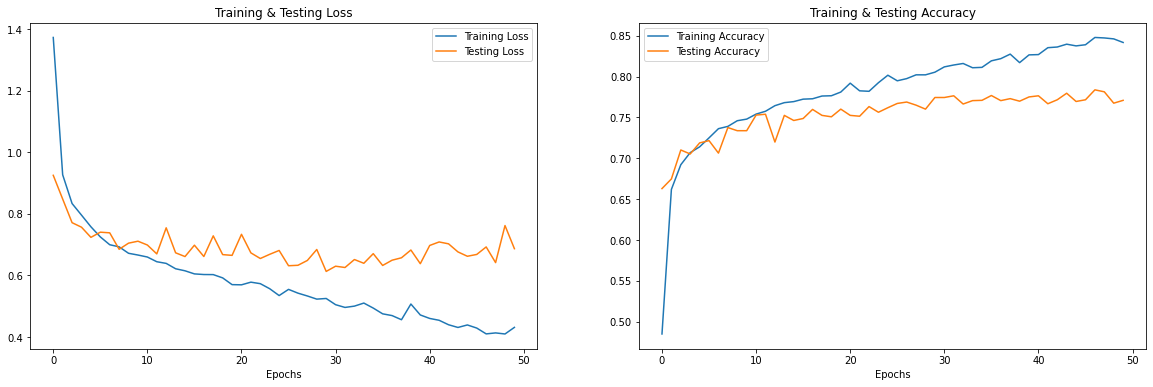

In [ ]:
print("Accuracy of our model on test data : " , Model.evaluate(x_test_scale, y_test_onehot)[1]*100 , "%")
# epochs = 50

epochs = [i for i in range(epoch)] # epoch!
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
lb = LabelEncoder()
emotion = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']
lb.fit(emotion)

pred_test = Model.predict(x_test_scale)

# print(pred_test.shape)
# print(np.argmax(pred_test, axis = 1))
# print(np.argmax(pred_test, axis = 1).shape)

pred_test = np.argmax(pred_test, axis = 1)
y_pred = lb.inverse_transform(pred_test) ## number -> string (emotion)

# print(y_pred.shape) # (358,)
# print(y_test_mel2d.shape) # list. 358

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
# cm = pd.DataFrame(cm , index = [i for i in lb.categories_] , columns = [i for i in lb.categories_])
cm = pd.DataFrame(cm , index = [i for i in emotion] , columns = [i for i in emotion])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()